<a href="https://colab.research.google.com/github/Natali-bali/TensorFlow_Tutorial/blob/master/03_CNN_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Convolutional Neural Networks and Computer Visison
* Build App which recognize food. Images from Kaggle Food101 Dataset

### Extracting Data from Zip File
* We get Dataset from tutorial storage. The full set from Kaggle was reduced to 2 dishes Pizza and Steak
* We start with smaller dataset to train model quicly and experiment. Then we can move to bigger dataset

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

--2021-06-14 14:44:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.20.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  92.3MB/s    in 1.1s    

2021-06-14 14:44:04 (92.3 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [ ]:
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd
import tensorflow.keras as keras
import tensorflow as tf
from matplotlib import pyplot as plt

from os import listdir, walk
from os.path import isfile, join
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
from keras.layers import MaxPool2D, Dense, Conv2D, Flatten

### Inspect directories

In [ ]:
for dirpath, dirnames, filenames in walk('/content/pizza_steak'):
  print(f'There are {len(dirnames)} directories, {len(filenames)} files in {dirpath}')
#Extra file is DS_store file  

There are 2 directories, 1 files in /content/pizza_steak
There are 2 directories, 1 files in /content/pizza_steak/train
There are 0 directories, 750 files in /content/pizza_steak/train/pizza
There are 0 directories, 750 files in /content/pizza_steak/train/steak
There are 2 directories, 1 files in /content/pizza_steak/test
There are 0 directories, 250 files in /content/pizza_steak/test/pizza
There are 0 directories, 250 files in /content/pizza_steak/test/steak


In [ ]:
!ls -la '/content/pizza_steak'

total 24
drwxr-xr-x 4 root root 4096 Jun 14 14:44 .
drwxr-xr-x 1 root root 4096 Jun 14 14:44 ..
-rw-r--r-- 1 root root 6148 Jun 14 14:44 .DS_Store
drwxr-xr-x 4 root root 4096 Jun 14 14:44 test
drwxr-xr-x 4 root root 4096 Jun 14 14:44 train


In [ ]:
img1 = keras.preprocessing.image.load_img('/content/pizza_steak/train/pizza/1029698.jpg')
img2 = keras.preprocessing.image.load_img('/content/pizza_steak/train/pizza/1008104.jpg')

(<matplotlib.image.AxesImage at 0x7f5df80e0490>,
 <matplotlib.image.AxesImage at 0x7f5df80eaa50>)

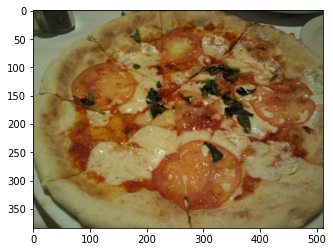

In [ ]:
 plt.imshow(img1, cmap = plt.cm.binary), plt.imshow(img2, cmap = plt.cm.binary)

In [ ]:
img1 = keras.preprocessing.image.img_to_array(img1)
img2 = keras.preprocessing.image.img_to_array(img2)

In [ ]:
img2.shape, img1.shape
#Images have different sizes

((384, 512, 3), (512, 512, 3))

In [ ]:
img1
# Its transformed to array

array([[[ 70.,  39.,   8.],
        [ 77.,  44.,  13.],
        [ 83.,  49.,  14.],
        ...,
        [237., 253., 243.],
        [241., 254., 245.],
        [243., 255., 247.]],

       [[ 74.,  41.,   8.],
        [ 79.,  45.,  10.],
        [ 86.,  48.,  12.],
        ...,
        [238., 254., 244.],
        [239., 255., 245.],
        [242., 255., 246.]],

       [[ 84.,  46.,  10.],
        [ 87.,  47.,  11.],
        [ 91.,  49.,  11.],
        ...,
        [238., 253., 246.],
        [238., 254., 244.],
        [239., 255., 245.]],

       ...,

       [[217., 247., 249.],
        [216., 246., 248.],
        [215., 245., 247.],
        ...,
        [192., 170., 133.],
        [188., 166., 129.],
        [185., 162., 128.]],

       [[216., 246., 248.],
        [214., 244., 246.],
        [213., 243., 245.],
        ...,
        [191., 169., 132.],
        [189., 167., 130.],
        [188., 165., 131.]],

       [[215., 246., 248.],
        [214., 244., 246.],
        [212., 2

In [ ]:
tf.constant(img1)
#We can transform img to tensor

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[ 70.,  39.,   8.],
        [ 77.,  44.,  13.],
        [ 83.,  49.,  14.],
        ...,
        [237., 253., 243.],
        [241., 254., 245.],
        [243., 255., 247.]],

       [[ 74.,  41.,   8.],
        [ 79.,  45.,  10.],
        [ 86.,  48.,  12.],
        ...,
        [238., 254., 244.],
        [239., 255., 245.],
        [242., 255., 246.]],

       [[ 84.,  46.,  10.],
        [ 87.,  47.,  11.],
        [ 91.,  49.,  11.],
        ...,
        [238., 253., 246.],
        [238., 254., 244.],
        [239., 255., 245.]],

       ...,

       [[217., 247., 249.],
        [216., 246., 248.],
        [215., 245., 247.],
        ...,
        [192., 170., 133.],
        [188., 166., 129.],
        [185., 162., 128.]],

       [[216., 246., 248.],
        [214., 244., 246.],
        [213., 243., 245.],
        ...,
        [191., 169., 132.],
        [189., 167., 130.],
        [188., 165., 131.]],

       [[215., 24

In [ ]:
path_pizza_train = '/content/pizza_steak/train/pizza'
path_pizza_test = '/content/pizza_steak/test/pizza'
path_steak_train = '/content/pizza_steak/train/steak'
path_steak_test = '/content/pizza_steak/test/steak'

In [ ]:
def open_files(path):
  images = []
  files_names = listdir(path)
  print(len(files_names))
  for file_name in files_names:
    img = keras.preprocessing.image.load_img(path+'/'+file_name)
    img = keras.preprocessing.image.img_to_array(img)
    #Normalize image
    img = img/255.0 
    #resize image
    target_size = (224,224)
    img = tf.image.resize(img, target_size)

    images.append(img)
  return images

In [ ]:
X_train = open_files(path_pizza_train)
y_train = [1]*len(X_train)
# X_train_ = open_files(path_steak_train)
# y_train.extend([0]*len(X_train_))
# X_train.extend(X_train_)

750


In [ ]:
len(X_train), len(y_train)

(750, 750)

In [ ]:
X_train = tf.constant(np.array(X_train))

In [ ]:
X_train.shape

TensorShape([750, 224, 224, 3])

### Get the Classes Names

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))[1:] # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


### Use tf.keras.preprocessing.image.ImageDataGenerator modul
- To import images from directories
- reshape them
- To scale 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.random.set_seed(42)
K.clear_session()

In [ ]:
train_datagen = ImageDataGenerator(rescale = (1.0/255))
test_datagen = ImageDataGenerator(rescale = (1.0/255))


#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = '/content/pizza_steak/train', 
                                            batch_size = 32,
                                            target_size = (224,224),
                                            class_mode = 'binary',
                                            seed = 42,
                                            shuffle = True)
test_data = test_datagen.flow_from_directory(directory = '/content/pizza_steak/test',
                                          batch_size = 32,
                                          target_size=(224,224),
                                          class_mode = 'binary',
                                          seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
len(images), len(labels), len(train_data)

(32, 32, 47)

In [ ]:
images[1].shape

(224, 224, 3)

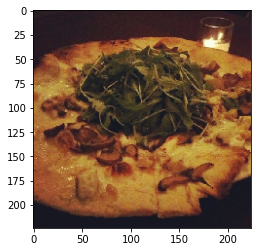

In [ ]:
plt.imshow(images[7], cmap = plt.cm.binary)

In [ ]:
#Build our model
# The network architecture Tiny VGG
model1 = keras.Sequential([
                  keras.layers.Conv2D(filters=10,
                                      kernel_size = 3,
                                      activation = 'relu',
                                      input_shape = (224,224,3)),
                  keras.layers.Conv2D(10, 3, activation = 'relu'),
                  keras.layers.MaxPool2D(pool_size = 2, 
                                         padding = 'valid'),
                  keras.layers.Conv2D(10, 3, activation = 'relu'),
                  keras.layers.Conv2D(10, 3, activation = 'relu'),
                  keras.layers.MaxPool2D(pool_size = 2, 
                                         padding = 'valid'),
                  keras.layers.Flatten(),        
                  keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(optimizer = keras.optimizers.Adam(), loss = keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

history1 = model1.fit(train_data, 
                      epochs = 5, 
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data),
                      )

Epoch 1/5
47/47 [==============================] - 41s 205ms/step - loss: 0.5497 - accuracy: 0.7220 - val_loss: 0.3937 - val_accuracy: 0.8500
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4196 - accuracy: 0.8160 - val_loss: 0.3388 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4068 - accuracy: 0.8267 - val_loss: 0.3299 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3734 - accuracy: 0.8353 - val_loss: 0.3632 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3336 - accuracy: 0.8647 - val_loss: 0.3288 - val_accuracy: 0.8780


It tooks 99 seconds without GPU
* Epoch 1/5
47/47 [==============================] - 99s 2s/step - loss: 0.5489 - accuracy: 0.7147 - val_loss: 0.3877 - val_accuracy: 0.8440

* Now we connect GPU and check again

WITH GPU MUCH FASTER
* Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 41s 199ms/step - loss: 0.5852 - accuracy: 0.6847 - val_loss: 0.4231 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4168 - accuracy: 0.8153 - val_loss: 0.3914 - val_accuracy: 0.8260

### Try to recreate model from previous lesson (Dense layers) and see if it works with image data

In [ ]:
K.clear_session()
tf.random.set_seed(42)

In [ ]:
model2 = keras.Sequential([
                           keras.layers.Dense(10, input_shape = (224,224,3), activation='relu'),
                           keras.layers.Dense(10, activation='relu'),
                           keras.layers.Flatten(),
                           keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model2.compile(optimizer=keras.optimizers.Adam(), metrics=['accuracy'], loss=keras.losses.BinaryCrossentropy())

In [ ]:
history2 = model2.fit(train_data, 
                      epochs = 5, 
                      steps_per_epoch= len(train_data),
                      validation_data = test_data,
                      validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 192ms/step - loss: 1.7562 - accuracy: 0.6820 - val_loss: 0.4882 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4767 - accuracy: 0.7953 - val_loss: 0.4373 - val_accuracy: 0.7940
Epoch 3/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3972 - accuracy: 0.8247 - val_loss: 0.6077 - val_accuracy: 0.7180
Epoch 4/5
47/47 [==============================] - ETA: 0s - loss: 0.3419 - accuracy: 0.8613

KeyboardInterrupt: ignored

In [ ]:
model2.summary()

In [ ]:
model3 = keras.Sequential([
                           keras.layers.Dense(100, input_shape = (224,224,3), activation='relu'),
                           keras.layers.Dense(100, activation='relu'),
                           keras.layers.Dense(100, activation='relu'),
                           keras.layers.Flatten(),
                           keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model3.compile(optimizer=keras.optimizers.Adam(), metrics=['accuracy'], loss=keras.losses.BinaryCrossentropy())

In [ ]:
history3 = model3.fit(train_data, 
                      epochs = 5, 
                      steps_per_epoch= len(train_data),
                      validation_data = test_data,
                      validation_steps = len(test_data))

### Baseline model
For every project we should build baseline model first and then improve it


In [ ]:
tf.random.set_seed(42)
K.clear_session()

In [ ]:
model_base = keras.Sequential([keras.layers.Conv2D(filters=10,
                                      kernel_size = 3,
                                      activation = 'relu',
                                      input_shape = (224,224,3)),
                               keras.layers.Flatten(),
                               keras.layers.Dense(1, activation = 'sigmoid')

])

In [ ]:
model_base.compile(loss = keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(), metrics = ['accuracy']
                   )

In [ ]:
history_base = model_base.fit(train_data, epochs = 5, steps_per_epoch=len(train_data),
               validation_data = test_data, validation_steps = len(test_data))

In [ ]:
pd.DataFrame(history_base.history).plot()

In [ ]:
def plot_loss_curves(history):
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))

  #Plot Loss
  plt.plot(epochs, train_loss, label = 'Training Loss')
  plt.plot(epochs, val_loss, label = 'Validation Loss')
  plt.title('Loss')
  plt.xlabel('epochs')
  plt.legend()

  #Plot Accuracy
  plt.figure()
  plt.plot(epochs, train_accuracy, label = 'Training Accuracy')
  plt.plot(epochs, val_accuracy, label = 'Validation Accuracy')
  plt.title('Accuracy')
  plt.xlabel('epochs')
  plt.legend()

In [ ]:
plot_loss_curves(history_base)

When validation loss starts to increase, it means than our model is **overfitting**, its learning training data too well
The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.


### Reducing Overfitting

Fitting a machine learning model comes in 3 steps:
- Create a basline.
- Beat the baseline by overfitting a larger model.
- Reduce overfitting.

So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:
- Increase the number of convolutional layers.
- Increase the number of convolutional filters.
- Add another dense layer to the output of our flattened layer.

To reduce overfitting:
- Add Data augmentation
- Add regularisation layers(MaxPool2D)
- Add more data

In [ ]:
tf.random.set_seed(42)
K.clear_session()

In [ ]:
model3 = keras.Sequential([
                           Conv2D(10, 3, input_shape = (224,224,3), activation = 'relu'),
                           MaxPool2D(),
                           Conv2D(10, 3, activation = 'relu'),
                           MaxPool2D(),
                           Conv2D(10, 3, activation = 'relu'),
                           MaxPool2D(),
                           Flatten(),
                           Dense(1, activation = 'sigmoid')
])

In [ ]:
model3.compile(loss = keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(), metrics = ['accuracy'])

In [ ]:
history3 = model3.fit(train_data, epochs = 5, validation_data=test_data, steps_per_epoch=len(train_data), validation_steps=len(test_data))

In [ ]:
plot_loss_curves(history3)

In [ ]:
model3.summary()

In [ ]:
model2.summary()

### Data Augmentation

Data augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.


Doing this simulates the kind of data a model might be used on in the real world.


If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.


🔑 Note: Data augmentation is usally only performed on the training data. Using the ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.0,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             rotation_range = 0.2,
                                             zoom_range = 0.2,
                                             shear_range = 0.2,
                                             horizontal_flip = True)

In [ ]:
train_data_augmented = train_datagen_augmented.flow_from_directory(directory = '/content/pizza_steak/train',
                                                                   target_size = (224,224),
                                                                   shuffle = False, #only to see the difference
                                                                   class_mode = 'binary',
                                                                   seed = 42)

In [ ]:
#Visualize Augmented data
images, labels = train_data_augmented.next()

In [ ]:
plt.imshow(images[7], cmap = plt.cm.binary)

In [ ]:
plt.imshow(img1, cmap = plt.cm.binary)

In [ ]:
#Train previous model on Augmented Data
train_data_augmented = train_datagen_augmented.flow_from_directory(directory = '/content/pizza_steak/train',
                                                                   target_size = (224,224),
                                                                   class_mode = 'binary',
                                                                   seed = 42)

In [ ]:
tf.random.set_seed(42)
K.clear_session()

In [ ]:
model4 = keras.Sequential([
                           Conv2D(10, 3, input_shape = (224,224,3), activation = 'relu'),
                           MaxPool2D(),
                           Conv2D(10, 3, activation = 'relu'),
                           MaxPool2D(),
                           Conv2D(10, 3, activation = 'relu'),
                           MaxPool2D(),
                           Flatten(),
                           Dense(1, activation = 'sigmoid')
])

In [ ]:
model4.compile(loss = keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(), metrics = ['accuracy'])

In [ ]:
history4 = model4.fit(train_data_augmented, epochs = 15, validation_data=test_data, steps_per_epoch=len(train_data_augmented), validation_steps=len(test_data))

In [ ]:
plot_loss_curves(history4)

### Improve our model

- Increase the number of model layers (e.g. add more convolutional layers).
- Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
- Train for longer (more epochs).
- Finding an ideal learning rate.
- Get more data (give the model more opportunities to learn).
- Use transfer learning to leverage what another image model has learned and adjust it for our own use case.


Adjusting each of these settings (except for the last two) during model development is usually referred to as hyperparameter tuning.


In [ ]:
tf.random.set_seed(42)
K.clear_session()

In [ ]:
model5 = keras.Sequential([
                           Conv2D(10, 3, input_shape = (224,224,3), activation = 'relu'),
                           Conv2D(10, 3, activation = 'relu'),
                           MaxPool2D(),
                           Conv2D(10, 3, activation = 'relu'),
                           Conv2D(10, 3, activation = 'relu'),
                           MaxPool2D(),
                           Conv2D(10, 3, activation = 'relu'),
                           Conv2D(10, 3, activation = 'relu'),
                           MaxPool2D(),
                           Flatten(),
                           Dense(1, activation = 'sigmoid')
])

model5.compile(optimizer = keras.optimizers.Adam(), loss = keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

history5 = model5.fit(train_data_augmented, epochs = 15, validation_data=test_data, steps_per_epoch=len(train_data_augmented), validation_steps=len(test_data))

In [ ]:
plot_loss_curves(history5)

### Predict  a random picture

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = keras.preprocessing.image.load_img('/content/03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)

In [ ]:
!wget https://rezepte.genius.tv/wp-content/uploads/2020/09/Pizza-titel.jpg
steak = keras.preprocessing.image.load_img('/content/Pizza-titel.jpg')
plt.imshow(steak)
plt.axis(False)

In [ ]:
def load_and_prep_image(path = '/content/03-steak.jpeg', img_size = (224,224)):
  img = keras.preprocessing.image.load_img(path)
  plt.imshow(img)
  plt.axis(False)
  img = keras.preprocessing.image.img_to_array(img)
  img = keras.preprocessing.image.smart_resize(img,img_size)
  img = img/255.0
  img = tf.expand_dims(img, axis = 0)
  return img

In [ ]:
steak = load_and_prep_image()

In [ ]:
pizza = load_and_prep_image(path = '/content/Pizza-titel.jpg')

In [ ]:
model5.predict(steak)

In [ ]:
model5.predict(pizza)

In [ ]:
# From tutorial
# Create a function to import an image and resize it to be able to be used with our modle
def load_and_prep_image_tutorial(filename, img_shape=224):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img


In [ ]:
class_names[int(tf.round(model5.predict(pizza)))]

In [ ]:
class_names[int(tf.round(model5.predict(steak)))]

In [ ]:
def load_and_pred(model, path, class_names = class_names):
  img = load_and_prep_image(path = path, img_size = (224,224))
  pred = model.predict(img)
  acc = round(pred[0][0]*100, 2)
  accuracy = 100 -  acc if acc <= 50 else acc
  print(f'Prediction: {class_names[int(tf.round(pred))]} with accuracy: {accuracy}%')

In [ ]:
load_and_pred(model5, '/content/Pizza-titel.jpg')

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 


In [ ]:
load_and_pred(model5, "03-pizza-dad.jpeg", class_names)